                                    # EDA y ETL

### INGESTA DE DATOS y ANÁLISIS EXPLORATORIO INICIAL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet("test.parquet")

In [4]:
train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [5]:
train.shape

(346479, 22)

### ANÁLISIS DE DUPLICADOS

El rubro inmobiliario se caracteriza por una rotación lenta del inventario de una inmobiliaria, y usualmente se requieren múltiples y variadas ofertas del inmueble antes de concretar una venta. Esto me lleva a inferir exhaustivamente si existen inmuebles repetidos en el listado. 
Esto es importante porque en caso de haber repeticiones múltiples del mismo inmueble, el muestreo con el cual entrenaré mi modelo estará fuertemente sesgado.

In [6]:
train.duplicated().sum()

0

Este resultado no es confiable, ya que sólo arrojará resultados si todas las columnas de un registro son iguales a otra.

Buscando valores duplicados en la descripción, veo que hay muchísimos registros repetidos, ya que la descripción puede ser modificada en distintos avisos para una misma propiedad. Con esto confirmamos la hipótesis inicial que habíamos planteado al inicio de este apartado.

In [7]:
train.duplicated(subset = ['description']).sum()

91488

In [8]:
train.duplicated(subset = ['url']).sum()

0

In [9]:
train.duplicated(subset = ['image_url']).sum()

178233

Este dato es clave. Una descripción se puede modificar, pero si remite a la misma url de la foto, hace referencia a la misma propiedad. Bajo este criterio de identificacion de duplicados, una gran parte de la muestra correspondería a propiedades repetidas.

Voy a chequear los valores que toma la columa 'image_url'

In [10]:
train['image_url'].value_counts()

https://images.craigslist.org/00R0R_ciYsssEFReq_600x450.jpg    363
https://images.craigslist.org/00q0q_bgmgyW6dLsd_600x450.jpg    345
https://images.craigslist.org/00X0X_XsEWPFYKuV_600x450.jpg     197
https://images.craigslist.org/01515_6IPWDkQhlPM_600x450.jpg    196
https://images.craigslist.org/00F0F_lD8FY29OOt4_600x450.jpg    196
                                                              ... 
https://images.craigslist.org/00m0m_9CJQRKgOE97_600x450.jpg      1
https://images.craigslist.org/00e0e_adxNPziRBFG_600x450.jpg      1
https://images.craigslist.org/00w0w_5hwofMx2HD6_600x450.jpg      1
https://images.craigslist.org/00f0f_iE2klsZWnEi_600x450.jpg      1
https://images.craigslist.org/00w0w_7irvBxq409N_600x450.jpg      1
Name: image_url, Length: 168246, dtype: int64

Para corroborar la hipótesis de valores repetidos, voy a evaluar para el primer resultado, si existen motivos por los cuales inferir sin margen de error que se trata de la misma propiedad.

In [11]:
train[(train['image_url']== 'https://images.craigslist.org/00R0R_ciYsssEFReq_600x450.jpg')]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
198,7046739043,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,735,apartment,800,2,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
510,7043528535,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,695,apartment,700,0,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
2552,7041806587,https://ksu.craigslist.org/apa/d/manhattan-don...,manhattan,https://ksu.craigslist.org,825,apartment,850,2,2.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
3209,7043536382,https://ksu.craigslist.org/apa/d/manhattan-don...,manhattan,https://ksu.craigslist.org,825,apartment,850,2,2.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
3710,7035290826,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,720,apartment,750,1,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337619,7044496004,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,735,apartment,825,2,1.5,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
338020,7047338260,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,695,apartment,700,0,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
341777,7047342887,https://ksu.craigslist.org/apa/d/manhattan-don...,manhattan,https://ksu.craigslist.org,1085,apartment,950,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
342812,7028881796,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,720,apartment,750,1,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks


In [12]:
train.drop_duplicates(subset='description', inplace=True)

In [13]:
train.drop_duplicates(subset='image_url', inplace=True)

In [14]:
train.shape

(149363, 22)

### ANÁLISIS DE FALTANTES

In [15]:
train.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            31177
parking_options            50177
image_url                      0
description                    0
lat                          842
long                         842
state                          0
dtype: int64

*parking_options*

Faltan más del 30% de los datos. Asignar esos valores faltantes de forma arbitraria puede sesgar fuertemente el modelo.
Por ello es que decido prescindir de la variable para el análisis.

*laundry_options*

En este caso falta el 20% de los valores. Utilizaré el mismo criterio.

### *ANÁLISIS DE VARIABLES - DISTRIBUCIÓN, CORRELACIÓN Y BUSQUEDA DE OUTLIERS*

Ante todo realizaré un histograma de todas las variables para tener un pantallazo general de la situacíon.

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'sqfeet'}>,
        <AxesSubplot: title={'center': 'beds'}>],
       [<AxesSubplot: title={'center': 'baths'}>,
        <AxesSubplot: title={'center': 'cats_allowed'}>,
        <AxesSubplot: title={'center': 'dogs_allowed'}>,
        <AxesSubplot: title={'center': 'smoking_allowed'}>],
       [<AxesSubplot: title={'center': 'wheelchair_access'}>,
        <AxesSubplot: title={'center': 'electric_vehicle_charge'}>,
        <AxesSubplot: title={'center': 'comes_furnished'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

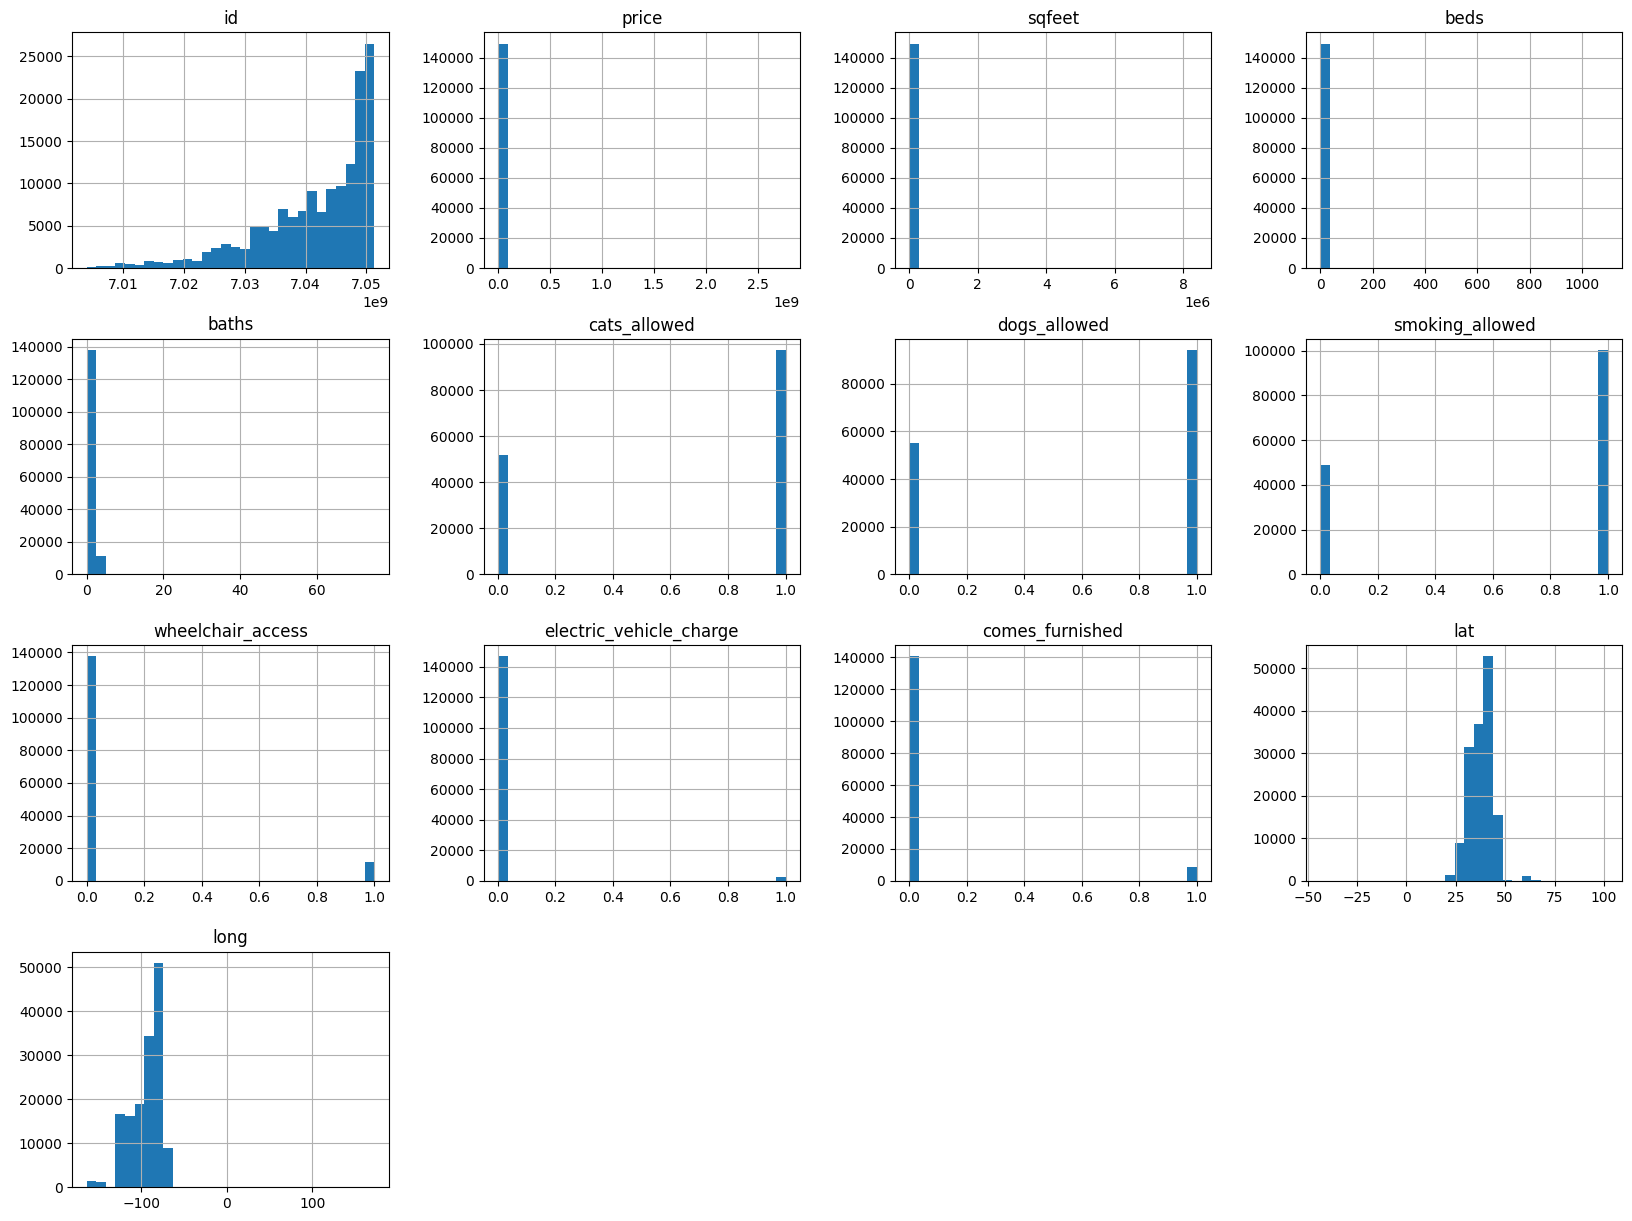

In [16]:
train.hist(bins=30 , figsize=(20,15))

Este gráfico general sirve para tener un panorama de la distribución de los datos y trazar una dirección de trabajo. A primera vista, vemos que las variables dummies demuestran la distribución esperada. Corroboraremos que todos sus datos son efectivamente 0 o 1.

In [17]:
train['cats_allowed'].value_counts()

1    97370
0    51993
Name: cats_allowed, dtype: int64

In [18]:
train['dogs_allowed'].value_counts()

1    94239
0    55124
Name: dogs_allowed, dtype: int64

In [19]:
train['smoking_allowed'].value_counts()

1    100320
0     49043
Name: smoking_allowed, dtype: int64

In [20]:
train['wheelchair_access'].value_counts()

0    137550
1     11813
Name: wheelchair_access, dtype: int64

In [21]:
train['comes_furnished'].value_counts()

0    140583
1      8780
Name: comes_furnished, dtype: int64

In [22]:
train['electric_vehicle_charge'].value_counts()

0    146801
1      2562
Name: electric_vehicle_charge, dtype: int64

Por otra parte, en las demás variables puedo inferir debido al tamaño de las escalas, que en varias de ellas tenemos la presencia de outliers.
Procederemos a trabajar sobre cada una de las variables de forma individual.

*Variable price*

La consigna pide implementar una transformación en el Dataframe en la cual se debe agregar una columna categórica que clasifique los precios de las propiedades en low, medium y high. Procedo a hacerlo ahora para dejar el Dataframe listo.

<AxesSubplot: ylabel='price'>

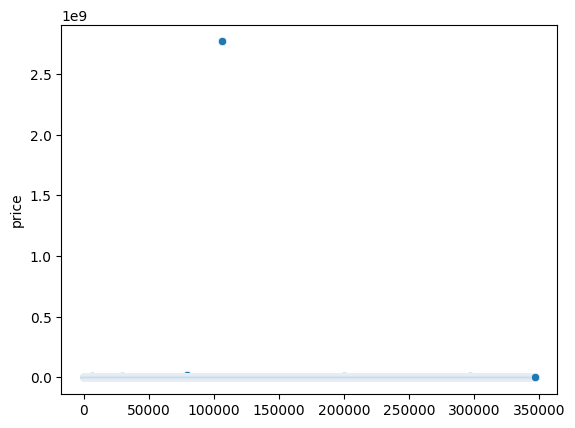

In [23]:
sns.scatterplot(train['price'])

Facilmente podemos identificar que hay valores que están totalmente por fuera de los valores de la realidad. Vamos a identificarlos y evaluarlos.

In [24]:
train[train['price'] > 500000].shape[0]

22

Algunas de esas propiedades podrían efectivamente tener ese valor de mercado. Sin embargo, como son pocas, las separaré de la muestra.

In [25]:
train.drop(train[train['price'] > 500000].index , inplace=True)

Liberados de los outliers extremadamente grandes, podemos ver ahora los valores realmente bajos.

In [26]:
train['price'].sort_values()

250344         0
211479         0
72118          0
31586          0
8911           0
           ...  
227130    409000
336190    409429
6288      430000
132544    450000
185615    479000
Name: price, Length: 149341, dtype: int64

In [27]:
train.loc[train['price'] == 0].shape[0]

477

Reemplazo los valores en cero por la mediana de la distribución. Son pocos valores y no afectará significativamente a la muestras.

In [28]:
train.loc[train['price'] == 0] = train['price'].median()

Debido a cambios en las especificaciones del pedido, aquellos registros en los cuales la columna price tome valores inferiores a 1000, llevarán el valor category_price de 1. Los demás valores llevarán el valor cero.

In [29]:
condiciones = [(train['price'] <= 999) , (train['price'] > 999)]
valores = ['1','0']
train['category_price'] = np.select(condiciones, valores)

In [30]:
train['category_price'].value_counts()

0    90962
1    58379
Name: category_price, dtype: int64

*Variable sqfeet*

<AxesSubplot: ylabel='sqfeet'>

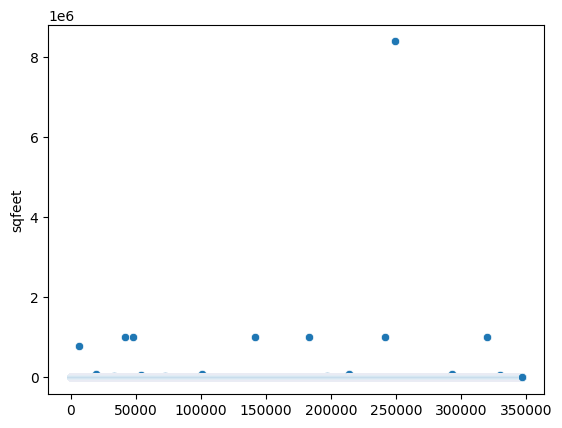

In [31]:
sns.scatterplot(train['sqfeet'])

In [32]:
train['sqfeet'].sort_values(ascending=False)

249237    8388607
47651     1019856
141803    1019856
241443     999999
183230     999999
           ...   
45445           0
122857          0
181344          0
337829          0
46723           0
Name: sqfeet, Length: 149341, dtype: int64

In [33]:
train.drop(train[train['sqfeet'] > 500000].index , inplace=True)

Cuento cuantos valores son cero. Al ver que son 28, para no perder los registros, decido completarlos con la mediana de la distribución.

In [34]:
train.loc[train['sqfeet'] == 0].shape[0]

28

In [35]:
train.loc[train['sqfeet'] == 0] = train['sqfeet'].median()

*Variable beds*

<AxesSubplot: ylabel='beds'>

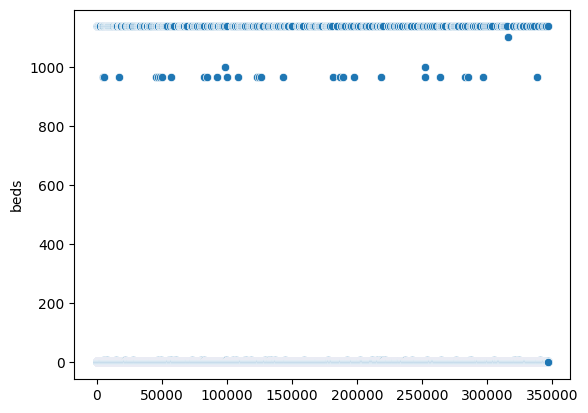

In [36]:
sns.scatterplot(train['beds'])

In [37]:
train['beds'].sort_values(ascending=False)

74191     1137
65206     1137
65239     1137
214235    1137
110782    1137
          ... 
27471        0
215399       0
156321       0
334816       0
41485        0
Name: beds, Length: 149333, dtype: int64

In [38]:
train['beds'].value_counts()

2       62751
1       42677
3       30554
4        6522
0        4410
5        1689
1137      477
6         169
7          34
967        28
8          19
1000        2
1100        1
Name: beds, dtype: int64

Veo que hasta 8 habitaciones, es algo lógico. Los valores por encima de 1000 son errores de carga y los reemplazaré por 1 (un habitación).

In [39]:
train.loc[train['beds'] >= 1000] = 1

*Variable baths*

<AxesSubplot: ylabel='baths'>

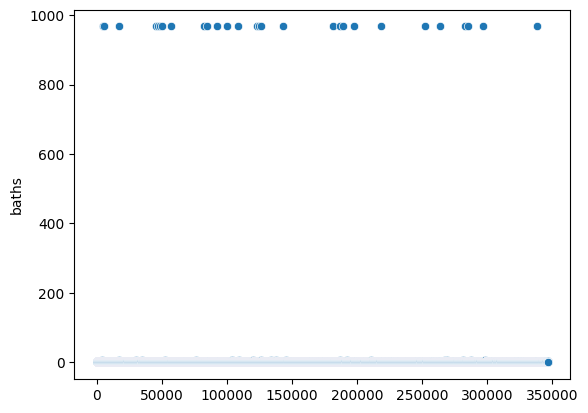

In [40]:
sns.scatterplot(train['baths'])

In [41]:
train['baths'].value_counts()

1.0      76281
2.0      50216
1.5      10116
2.5       6863
3.0       3027
0.0       1307
3.5        655
4.0        585
4.5        120
5.0         76
5.5         37
967.0       28
6.0         14
6.5          4
7.0          2
7.5          1
8.0          1
Name: baths, dtype: int64

Suele considerarse el 0.5 que acompaña al valor entero del baño como un antebaño.
Esas 28 observaciones que figuran con 967 baños, seran arbitradamente modificadas al valor 2.

In [42]:
train.loc[train['baths'] > 100] = 2

*Variables lat y long*

Ya hemos trabajado previamente de forma exhaustiva sobre este campo cuando realizamos la limpieza de duplicados. Ahora veremos sobre un mapa la distribución de las coordenadas para identificar la distribución geográfica de la muestra.

<AxesSubplot: xlabel='lat', ylabel='long'>

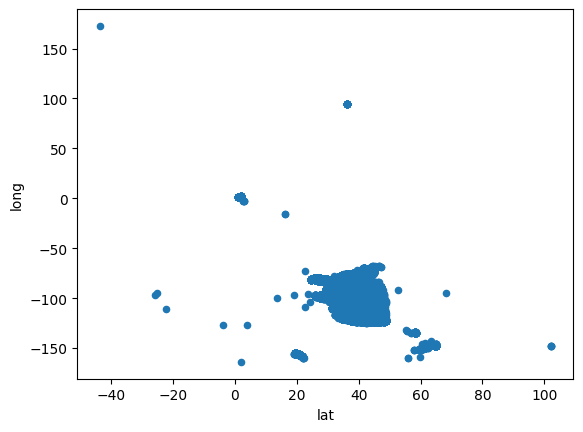

In [43]:
train.plot(kind='scatter', x='lat',y='long')

Vemos que posiblemente tengamos algún valor que no se corresponde con el territorio de USA. Para estar seguros, trabajaré en un anexo a este cuaderno llamado "mapa.ipynb" para optimizar el trabajo, ya que debo renunciar a varias columnas sin valores de ubicación para plottear el mapa.

In [44]:
df_mapa = train

In [45]:
df_mapa.to_csv('dfm.csv')

Con los datos obtenidos en el cuaderno auxiliar, procedemos a eliminar los registros considerados outliers.

In [46]:
train.drop(train[train['lat'] > 67.2264].index , inplace=True)
train.drop(train[train['lat'] < 20.6973].index , inplace=True)
train.drop(train[train['long'] > -60.4121].index , inplace=True)
train.drop(train[train['long'] < -154.2793].index , inplace=True)

Efectivamente corroboramos que los outliers fueron correctamente eliminados.

In [47]:
train.shape[0]

147404

### *TRATAMIENTO DE VARIABLES CATEGÓRICAS*

El modelo nos provee 6 variables categóricas: state, type, region, region url, url y description. Las últimas tres hacen referencia a cuestiones operativas de la publicación del aviso de venta de la propiedad, por lo cual son irrelevante para el modelo y por ello las elimino directamente para disminuir el llamado Efecto Hughes.
Respecto de las primeras 3 variables, infiero que pueden ser importantes, aunque a priori sospecho que state y region son redundantes.
Una vez pulida la data, transformaré las columnas categóricas a valores numéricos para disponibilizarlos para análisis posterior.

*Variable type*

In [48]:
train['type'].value_counts()


apartment          107478
house               22454
townhouse            6605
condo                4084
duplex               3337
manufactured         2063
cottage/cabin         562
flat                  348
loft                  334
in-law                130
land                    7
assisted living         2
Name: type, dtype: int64

<AxesSubplot: ylabel='type'>

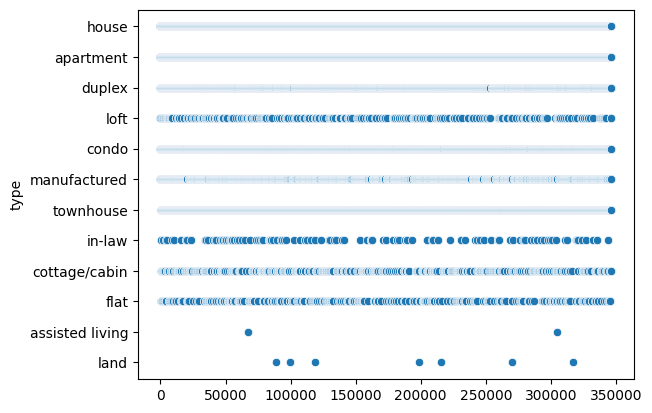

In [49]:
sns.scatterplot(train['type'])

*Variable state*

<AxesSubplot: >

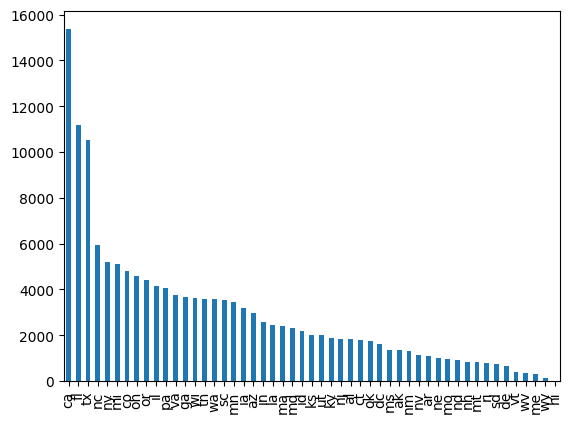

In [50]:
train['state'].value_counts().plot(kind='bar')

La distribucióñ claramente sesgadas hacia California, Florida y Texas nos da la idea de que la inmobiliaria centra sus operaciones en esos estados.

In [51]:
train['state'].value_counts()

ca    15375
fl    11169
tx    10540
nc     5932
ny     5179
mi     5126
co     4819
oh     4583
or     4413
il     4158
pa     4037
va     3751
ga     3676
wi     3615
tn     3583
wa     3557
sc     3536
mn     3442
ia     3202
az     2982
in     2593
la     2462
ma     2414
md     2321
id     2200
ks     2023
ut     1985
ky     1869
nj     1850
al     1832
ct     1777
ok     1746
dc     1609
ms     1348
ak     1329
nm     1305
nv     1127
ar     1069
ne     1011
mo      956
nd      919
nh      822
mt      813
ri      780
sd      721
de      649
vt      394
wv      350
me      316
wy      130
hi        9
Name: state, dtype: int64

Actualmente USA cuenta con 69 estados, considerando todo su territorio.

In [52]:
estados = pd.read_excel('Estados_USA.xlsx')
estados.head()

,Estado,Código
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [53]:
estados.shape[0]

69

Verifico que los valores únicos de los códigos de los estados no sean más que los estados que realmente existen.

In [54]:
train['state'].unique().size

51

Ahora genero dos arrays, uno con los nombres de los códigos de los estados de mi muestra y otro con los códigos de los nombres que realmente existen.
Posteriormente verifico que no haya algún nombre que no corresponda.

In [55]:
a = train['state'].str.upper().sort_values().unique()
a

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [56]:
b = estados['Código'].sort_values().unique()
b

array(['AA', 'AB', 'AE', 'AK', 'AL', 'AP', 'AR', 'AZ', 'BC', 'CA', 'CO',
       'CT', 'Código', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MB', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NB', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NL', 'NM', 'NS',
       'NT', 'NU', 'NV', 'NY', 'OH', 'OK', 'ON', 'OR', 'PA', 'PE', 'QC',
       'RI', 'SC', 'SD', 'SK', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', 'YT', nan], dtype=object)

In [57]:
def sublista(a, b):
    return [x for x in a if x not in b]

sublista(a,b)

[]

Vemos que al no devolver valor alguno, quiere decir que los códigos de los estados están todos correctamente asignados. Por lo tanto los valores del campo state son todos correctos.

*Variable region*

A priori al graficar la data en un barplot puedo ver una distribución muy similar a los datos de la columna state, lo cual en principio es una señal en favor de aceptar que las variables son redundantes, por obvias razones.

<AxesSubplot: >

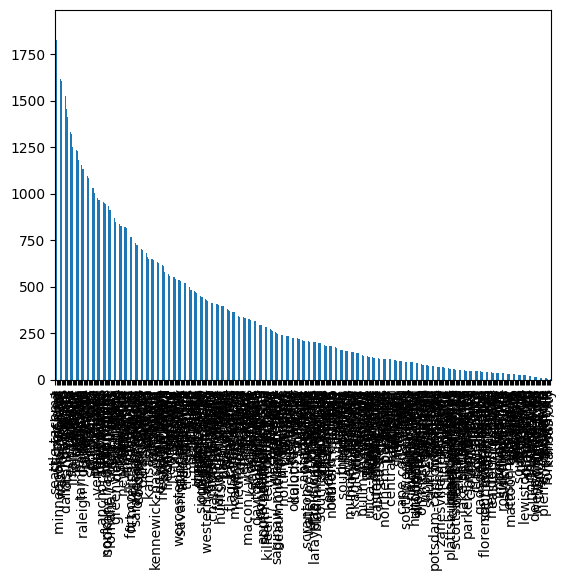

In [58]:
train['region'].value_counts().plot(kind='bar')

Si plotemos un gráfico de dispersión de ambas variables, podemos ver que existe una fuerte correlación entre ambas. El limite izquierdo que hay en las dispersiones se debe a los límites geográficos del tamaños de ambas variables. La dispersión hacia la derecha del límite nos muestra que:
* Hay estados que se encuentran en diversas regiones.
* Hay regiones que abarcan diversos estados.

<AxesSubplot: xlabel='region', ylabel='state'>

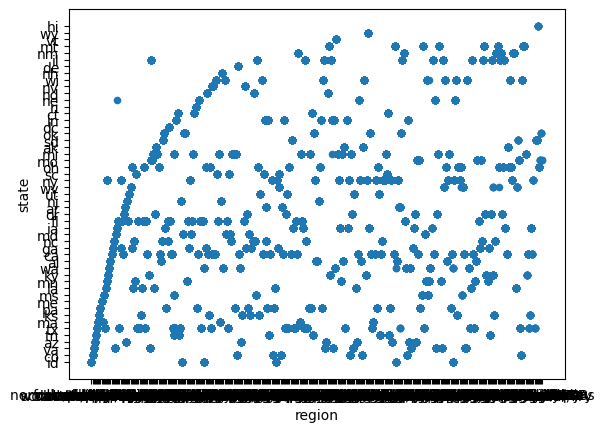

In [59]:
train.plot(kind='scatter', x='region',y='state')

## *ESPECIFICACIÓN DEL MODELO*

En este apartado tomaré las decisiones que como científico de datos debo realizar a la hora de optimizar mi módelo. Considero que el trabajo de EDA, ETL y especificación del modelo es una vital del proceso. Pequeñas decisiones en estas etapas del workflow pueden causar estragos en las previsiones posteriores del modelo.
Inicialmente voy a prescindir de varias columnas, muchas de las cuales he anticipado en el desarrollo del paper. El objetivo de esta etapa, es preparar un Dataset apropiado para la posterior profundización de la especificación del proceso, en función de los objetivos de los dos modelos solicitados por la inmobiliaria.

### ELIMINACIÓN DE COLUMNAS

In [60]:
train.columns.values

array(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet',
       'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description',
       'lat', 'long', 'state', 'category_price'], dtype=object)

In [61]:
train.drop(['id','price','description', 'image_url', 'region_url', 'url', 'lat', 'long','laundry_options','parking_options'], axis=1, inplace=True)

In [62]:
train.head(3)

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,state,category_price
0,boise,house,1200,2,2.0,1,1,1,0,0,0,id,0
1,colorado springs,apartment,694,1,1.0,1,1,1,0,0,0,co,0
2,norfolk / hampton roads,apartment,900,2,2.0,0,0,1,0,0,0,va,0


In [63]:
train.shape

(147404, 13)

Finalizado el proceso de limpieza de los datos, los guardo en otro archivo para su consulta futura.

In [64]:
train.to_csv('df_train2.csv', index = False)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147404 entries, 0 to 346478
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   147404 non-null  object 
 1   type                     147404 non-null  object 
 2   sqfeet                   147404 non-null  int64  
 3   beds                     147404 non-null  int64  
 4   baths                    147404 non-null  float64
 5   cats_allowed             147404 non-null  int64  
 6   dogs_allowed             147404 non-null  int64  
 7   smoking_allowed          147404 non-null  int64  
 8   wheelchair_access        147404 non-null  int64  
 9   electric_vehicle_charge  147404 non-null  int64  
 10  comes_furnished          147404 non-null  int64  
 11  state                    147404 non-null  object 
 12  category_price           147404 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 15.7+ MB


Una vez finalizado el proceso, procedo a aplicar todas las transformaciones relizadas sobre las columnas al dataframe test y lo exporto a un archivo csv para su posterior utilización.

In [66]:
test.shape

(38498, 21)

In [67]:
test.drop(['id','description', 'image_url', 'region_url', 'url', 'lat', 'long','laundry_options','parking_options'], axis=1, inplace=True)

In [68]:
test['category_price'] = ''

In [102]:
test.shape

(38498, 13)

In [110]:
test.isna().sum()

region                     0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
state                      0
category_price             0
dtype: int64

In [70]:
train.to_csv('df_test2.csv', index = False)

##                      MODULO DE MACHINE LEARNING SUPERVISADO

Limpia la data, para analizarla en este apartado será necesario transformarla para poder manipularla.

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [72]:
train.columns

Index(['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'state',
       'category_price'],
      dtype='object')

In [73]:
train['region_le'] = le.fit_transform(train['region'])
train['type_le'] = le.fit_transform(train['type'])
train['state_le'] = le.fit_transform(train['state'])
train.drop(['region', 'type', 'state'], axis=1, inplace=True)

Ahora transformo todas las variables en int64 para poder manipularlas.

In [74]:
train = train.astype(int)

## Matriz de correlación de las variables

En este apartado observaremos las relacciones entre las variables mediante el coeficiente de correlación entre ellas y precio. Para ellos utilizaremos diversas herramientas gráficas que nos permiten evalular a simple vista dichas relaciones.
Veremos dos matrices que nos ilustran los coeficientes de correlación, una bajo el criterio de Spearman y la segunda bajo el de Pearson.
Es importantes destacar que hay variables que pueden estar igualmente relacionadas y que éstos métodos no detecten.

*Correlación de Spearman*

Los coeficientes de correlación de Spearman solo miden relaciones monótonas entre las variables, es decir la medida en que tienden a cambiar al mismo tiempo aunque la proporción o tasa de cambio no sea constante. Es por esto que en caso que haya una relación lineal, el coeficiente de Spearman siempre arrojará datos más elevados que el de Pearson en comparación.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

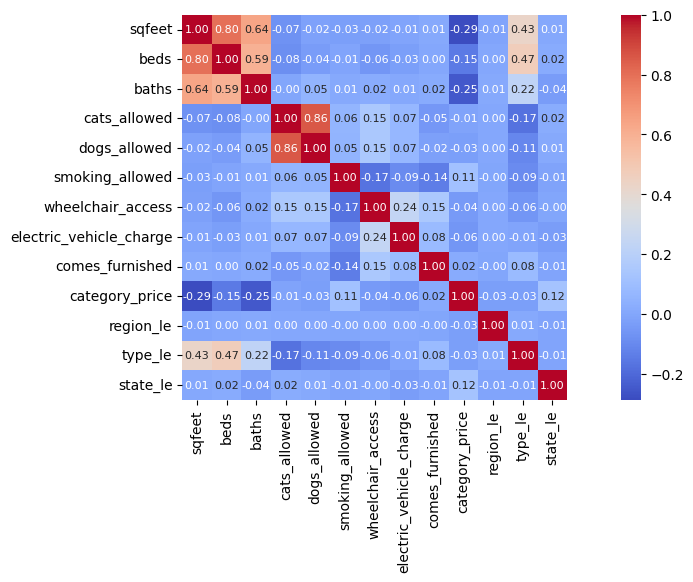

In [76]:
corr = train.corr(method='spearman')
plt.figure(figsize=(14,5))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
        xticklabels= train.columns, 
        yticklabels= train.columns,
        cmap= 'coolwarm')

plt.show() 

Como es de esperarse, vemos que existe una fuerte relación positiva entre type_le y bala cantidad de baños y la cantidad de habitaciones. Más leve, tambien vemos una correlación entre el tipo de propiedad con las tres variables mencionadas anteriormente. Esto es porque valores elevados de type_le se asignaron a condo, house o townhouse, las cuales son propiedadaes más grandes.

*Correlación de Pearson*

Un coeficiente de correlación de Pearson será más elevado en tanto más lineal y pari passu sea la relación entre los cambios en las variables.
En este caso vemos que hay variables que están altamente correlacionadas con la variable precio, y otras que casi no tienen relación.
Asimismo, también se aprecia que algunas variables tienen una altísima correlación entre si, lo cual implica un enorme riesgo de que nuestra estimación cuente con problemas de multicolinealidad.
En el próximo apartado abordaremos estos temas en detalle.

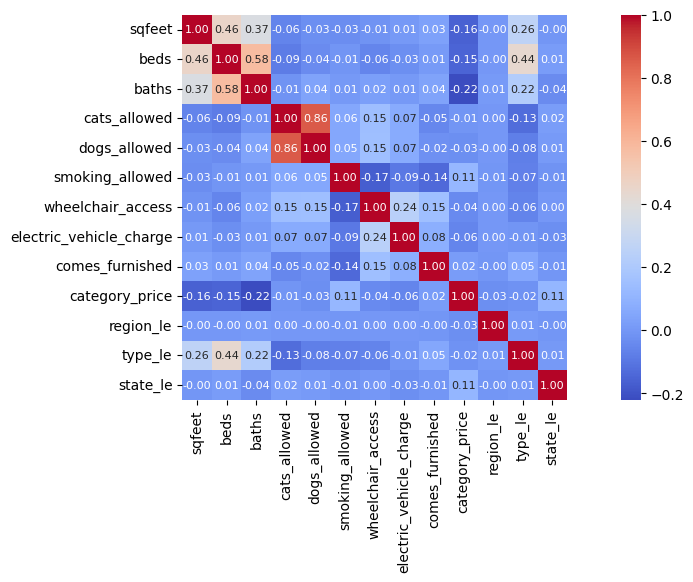

In [77]:
corr = train.corr(method='pearson')
plt.figure(figsize=(14,5))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= train.columns, 
           yticklabels= train.columns,
           cmap= 'coolwarm')

plt.show()

Como era de esperarse, bajo la correlación de pearson los coeficientes son menores. Sin embargo la correlación entre las variables cats_allowed y dogs_allowed es muy elevada, lo que puede llevar a problemas de multicolinealidad. Voy a eliminar la variable dogs_allowed de ambos dataframes para la prueba.
También ya puedo desprenderme de la columa id, pues ya no tiene utilidad.

Voy correr un modelo de ML del algortimo de clasificación DecisionTree. Ire modificando los parámetros y las variables de análisis para mejorar su rendimiento.

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [122]:
X = train.drop(columns=['category_price']) 
y = train['category_price'] 
ytest = test

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [124]:
clf_dt = DecisionTreeClassifier(max_depth = 18)
clf_dt.fit(X_train , y_train)
y_pred_dt = clf_dt.predict(X_test)

In [125]:
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))

0.8454841481615486
0.7820270965529069


In [126]:
print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf_dt.score(X_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf_dt.score(X_test, y_test)))

Precisión en el set de entrenamiento:  0.93
Precisión en el set de testeo:  0.85


Veremos mediante una regresión cuales son las variables explicativas que tienen menos impacto en la explicación de la categoría.

In [89]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=13, n_informative=8, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 13) (10000,)


In [90]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=10000, n_features=13, n_informative=8, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 13) (10000,)


Feature: 0, Score: 0.20674
Feature: 1, Score: 0.01470
Feature: 2, Score: 0.02796
Feature: 3, Score: 0.00395
Feature: 4, Score: 0.17148
Feature: 5, Score: 0.00363
Feature: 6, Score: 0.00383
Feature: 7, Score: 0.00823
Feature: 8, Score: 0.19061
Feature: 9, Score: 0.00370
Feature: 10, Score: 0.34969
Feature: 11, Score: 0.00398
Feature: 12, Score: 0.00383
Feature: 13, Score: 0.00375
Feature: 14, Score: 0.00392


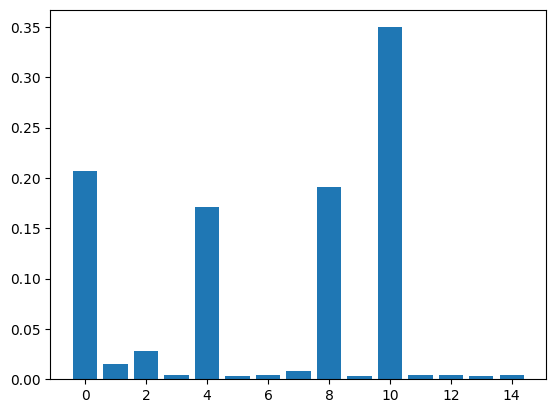

In [95]:

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=10000, n_features=15, n_informative=8, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [97]:
train.columns

Index(['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'category_price', 'region_le', 'type_le',
       'state_le'],
      dtype='object')

Voy a eliminar de mi variable X las columnas 'comes_furnished', 'electric_vehicle_charge', 'comes_furnished', 'wheelchair_access' y 'dogs_allowed' por ser redundate con 'cats_allowed'.

In [127]:
X = train.drop(columns=['category_price','comes_furnished', 'electric_vehicle_charge', 'comes_furnished', 'wheelchair_access','dogs_allowed']) 
y = train['category_price']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [130]:
clf_dt2 = DecisionTreeClassifier(max_depth = 18)
clf_dt2.fit(X_train , y_train)
y_pred_dt = clf_dt2.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))

0.8447605264348063
0.7847956559016862
